# ¡Hola Claudio! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Buen trabajo Claudio! Has completado correctamente todo lo necesario del notebook, realizaste un gran trabajo aplicando los conocimientos de analítica necesarios, se nota que los manejas muy bien. No tengo comentarios de corrección obligatorios, pero he dejado algunos comentarios opcionales que ayudarán a complementar tu notebook. De todas formas, tu proyecto está aprobado. Felicitaciones por completar el notebook en la primera revisión, mucho éxito en el siguiente sprint!

Saludos!

</div>

----

## Paso 1. Abre el archivo de datos y estudia la información general 

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
# Cargar dataset
games = pd.read_csv("/datasets/games.csv")

In [3]:
# Imprimir la onformacion del DF
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Imprimir muestra de los datos para analizarlos.
games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8741,Klax,2600,1989.0,Puzzle,0.14,0.01,0.00,0.00,NaN,NaN,NaN
10196,Bionicle Heroes,GC,2006.0,Shooter,0.08,0.02,0.00,0.00,51.0,5.2,E10+
3843,FIFA 12,PSP,2011.0,Sports,0.12,0.25,0.02,0.13,NaN,NaN,NaN
6240,Donkey Kong GB: Dinky Kong & Dixie Kong,GB,2000.0,Platform,0.00,0.00,0.28,0.00,NaN,NaN,NaN
5870,Fossil Fighters (JP sales),DS,2008.0,Role-Playing,0.00,0.00,0.30,0.00,NaN,NaN,NaN


## Paso 2. Corregir y preparar datos

## Datos a corregir:
- Poner el nombre de las columnas en minusculas
- "year_of_release" vamos a corregir y ponerlo a tipo de dato entero.
- Hay datos en "user_score" que viene como TBD esos datos vamos a ponerlos NaN
- "user_score" tambien cambiara de tipo de dato de object a float.
-  Asegurar que en "critic_score" tambien pongamos los valores ausentes en "NaN"

In [5]:
# Reemplaza los nombres de las columnas (ponlos en minúsculas).
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Convertir "year_of_release" en tipo de datos entero
games["year_of_release"] = games["year_of_release"].astype("Int64")

In [7]:
# Convertir datos de TBD a Nan en "user_score" y a tipo flotante
games["user_score"] = games["user_score"].replace("tbd", np.nan)
games["user_score"] = pd.to_numeric(games["user_score"], errors="coerce")
games.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [8]:
# Poner todos los valores ausentes o raros en "Nan" de "critic_score"
games["critic_score"] = pd.to_numeric(games["critic_score"], errors="coerce")

In [9]:
# Imprimir muestra de los datos para analizarlos confirmar modificaciones
games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15076,Bust-A-Move,3DO,1994,Puzzle,0.00,0.00,0.02,0.00,NaN,NaN,NaN
6719,F1 2000,PS,2000,Racing,0.14,0.09,0.00,0.02,NaN,NaN,NaN
15802,GA - Geijutsuka Art Design Class: Slapstick Wo...,PSP,2010,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
8117,Metal Gear Ac!d 2,PSP,2005,Strategy,0.11,0.00,0.05,0.01,NaN,NaN,NaN
12424,My Pet Chimp,DS,2010,Simulation,0.06,0.00,0.00,0.00,NaN,NaN,E


<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Bien hecho. En los casos donde hay demasiados en una columna, me parece bien dejar los nulos tal como están o reemplazarlos por algún valor identificable. En este caso, no hay data suficiente para hacer una imputación adecuada y en caso de rellenar con la media o mediana, se introduce un sesgo muy fuerte en la data, por lo que no es adecuado.



</div>

# Explicacion
- Se cambio tipo de dato de "year_of_release" a tipo entero ya que los años deben de ser de ese tipo  y se permiten los datos de tipo Nan
- En "user_score" se cambio a tipo de dato float por que se necesita trabajar con puntajes numericos para calculos y se cambio "tbd" a "NaN" por que no se deben considerar por que no hay una base real.
- Se confirmo todos los valores raro o ausentes en "critic_score" a "NaN" para mejores calculos. se dejaron en "NaN" porque hubo juegos que no fueron calificados por los criticos. 

In [10]:
# Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.
games["global_sales"] = games[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1)
games[["na_sales","eu_sales","jp_sales","other_sales","global_sales"]].head()

,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,41.36,28.96,3.77,8.45,82.54
1,29.08,3.58,6.81,0.77,40.24
2,15.68,12.76,3.79,3.29,35.52
3,15.61,10.93,3.28,2.95,32.77
4,11.27,8.89,10.22,1.00,31.38


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien, también podrías haber usado

```python
    df[['na_sales','jp_sales','eu_sales','other_sales']].sum(axis=1)
```
</div>

## Paso 3. Analiza los datos

In [11]:
# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
games_per_year = games["year_of_release"].value_counts() # se suman los juegos lanzados por año
games_per_year = games_per_year.sort_index()
print(games_per_year)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


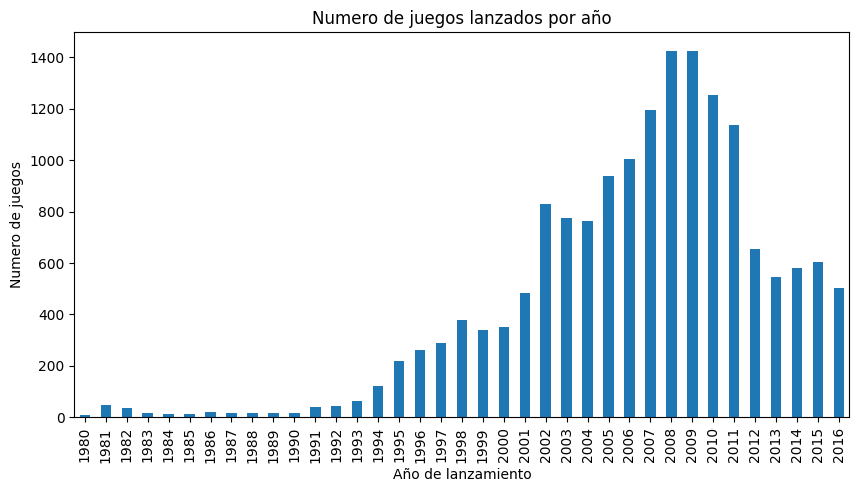

In [12]:
# Grafiquemos la distribucion de lanzamientos por año
games_per_year.plot(kind="bar", figsize=(10,5))
plt.title("Numero de juegos lanzados por año")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Numero de juegos")
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor     </b> <a class="tocSkip"></a>

Bien, correcto. El gráfico es claro, hubo un peak a fines de los 2000 y luego ha caido a niveles similares a los de inicios del 2000.

</div>

- Si son significativos apartir del año 1994 hubo un incremento importante en el lanzamiento de juegos. asi hasta el 2011 donde apartir del 2012 empezaron a descender lo lanzamientos.

In [13]:
#  Elige las plataformas con las mayores ventas totales
platform_sales = games.groupby("platform")["global_sales"].sum() # Aqui agrupamos las plataformas con las ventas totales
platform_sales = platform_sales.sort_values(ascending=False)
print(platform_sales.head(10))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: global_sales, dtype: float64


In [14]:
# construye una distribución basada en los datos de cada año.
platform_year_sales = games.pivot_table(
    index="year_of_release", # toma el año como index
    columns="platform", # toma las plataformas como columnas
    values="global_sales", 
    aggfunc="sum",
    fill_value=0 # Aqui es se llena los datos NaN con 0 para saber que ese año no hubo ventas de esa plataformas (no existian algunas aun).
 
)
platform_year_sales.sample(15)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1990,0.00,0.0,0.00,0.00,0.00,4.89,0.00,0.00,2.60,0.00,...,0.00,0.0,26.15,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.0,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2013,0.00,0.0,56.57,0.00,1.54,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,8.59,21.65,88.58,0.00,18.96
1984,0.27,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2006,0.00,0.0,0.00,0.00,119.81,0.00,5.28,11.26,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,137.15,0.00,51.62,10.04,0.00
2007,0.00,0.0,0.00,0.02,146.94,0.00,3.40,0.27,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,152.77,0.00,95.41,0.55,0.00
2016,0.00,0.0,15.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,0.18,4.60,1.52,0.00,26.15


In [15]:
# Busca las plataformas que solían ser populares pero que ahora no tienen ventas.
platform_time = games.groupby("platform")["year_of_release"].agg([min,max]) # Agrupamos plataforma com index con el min y maximo de las plataformas como columnas
platform_time["lifetime"] = platform_time["max"] - platform_time["min"] # Restamos el minimo y maximo de cada plataforma para sacar lcuantos años duro la plataforma
platform_time.sort_values(by="lifetime", ascending=False ,inplace=True) # acomodamos de mayor a menor para saber cuales fueron los populares
platform_time

,min,max,lifetime
platform,,,
PC,1985,2016,31
DS,1985,2013,28
GB,1988,2001,13
X360,2005,2016,11
PSP,2004,2015,11
PS2,2000,2011,11
NES,1983,1994,11
DC,1998,2008,10
Wii,2006,2016,10


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho! Muy bien con la aplicación de agrupaciones para encontrar los primeros y últimos años de cada consola. Así, tenemos una medida precisa de sus años de vida de uso.

</div>

In [16]:
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
avg_life = platform_time["lifetime"].mean()
print("Duracion promedio de vida de una plataforma:", avg_life.round(2), "años") # quite 4 decimales para mas limpieza del promedio

Duracion promedio de vida de una plataforma: 7.61 años


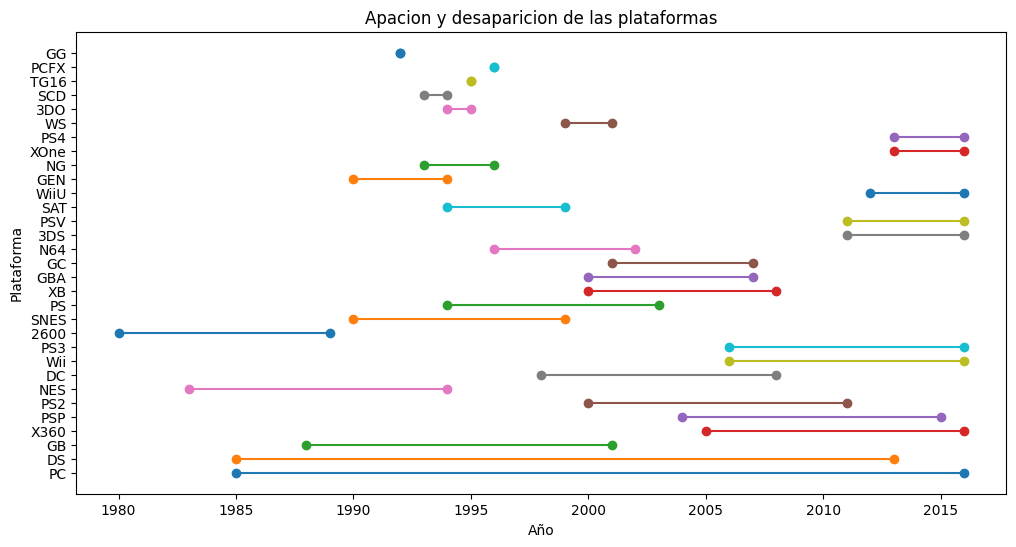

In [17]:
plt.figure(figsize=(12,6))
for platform in platform_time.index:
    plt.plot([platform_time.loc[platform, "min"], platform_time.loc[platform, "max"]], [platform, platform], marker="o") # Linea horizontal con el inicio y fin de la plataforma se marca con "o"
plt.xlabel("Año")
plt.ylabel("Plataforma")
plt.title("Apacion y desaparicion de las plataformas")
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Excelente, muy buen gráfico, permite apreciar el periodo de vida de cada consola, queda clarísimo!

</div>

- Se puede observar que las plataformas nuevas suelen aparecer entre 1 a 2 años eso significa sus primeras ventas.
- Las plataformas antiguas desaparecen entre 5  a 10 años.
- Se calculo en la parte de arriba el promedio de vida de la plataforma que es de 7.61 años

### Determino que tenemos que excluir de los datos el año 2016 por que esta incompleto  y los años mas antiguos que tienen muy pocos juegos y no es tan representativo.
### Se tomara los años mas significativos del año 1994 al 2015

In [18]:
# Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
games_filtered = games[(games["year_of_release"] >= 1994) & (games["year_of_release"] <= 2015)].copy() # Se filtra por los años confiables y usamos .copy para  asegurar de no afectar el dateframe original por los cambios posteriores.
games_filtered[["year_of_release", "platform", "global_sales"]].sample(10)

,year_of_release,platform,global_sales
13471,1999,N64,0.05
11212,2014,PS3,0.09
8923,2014,PS4,0.15
3092,2010,Wii,0.65
9781,2011,PS3,0.12
9569,2006,X360,0.13
11332,2010,PS3,0.09
3143,2003,PS2,0.63
9897,2010,PS3,0.12
13086,2003,GBA,0.05


<div class="alert alert-block alert-warning">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

El objetivo de la data a analizar posteriormente es que sea data que sirva para proyectar el 2017. En ese sentido, no se puede utilizar data muy antigua, ya que eso incluiría consolas que ya no existen y tendencias que ya no se repetirán para l
as consolas aún vigentes. En general, un mínimo de 2 años es suficiente y hasta 4 años puede ser útil. Tomar más años provocaría el problema que menciono.
    
El periodo de tiempo escogido no es el ideal, pero  no hay problema con que lo dejes así para este notebook, pero ten en cuenta que para industrias muy cambiantes, probablemente 3 años de data histórica ya es suficiente y 4 años es demasiado.

</div>

In [19]:
#¿Qué plataformas son líderes en ventas?
platform_sales = games_filtered.groupby("platform")["global_sales"].sum() #Se suman de nuevo las ventas globales por plataforma ya con los datos filtrados con los años bien
platform_sales = platform_sales.sort_values(ascending=False)
platform_sales.head(10)

platform
PS2     1233.56
X360     959.72
PS3      927.74
Wii      891.00
DS       802.76
PS       727.58
GBA      312.88
PSP      289.53
XB       251.57
PC       247.41
Name: global_sales, dtype: float64

In [20]:
# se construye otra distribución basada en los datos de cada año ya filtrados para poder sacar el grafico de las plataformas rentables
platform_year_sales = games_filtered.pivot_table(
    index="year_of_release", # toma el año como index
    columns="platform", # toma las plataformas como columnas
    values="global_sales", 
    aggfunc="sum",
    fill_value=0 # Aqui es se llena los datos NaN con 0 para saber que ese año no hubo ventas de esa plataformas (no existian algunas aun).
)
platform_year_sales.head()

platform,3DO,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1994,0.02,0.0,0.00,0.0,12.18,0.0,0.0,8.13,0.00,0.11,...,3.65,0.36,35.08,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.08,0.0,0.00,0.0,3.60,0.0,0.0,0.00,0.00,0.00,...,11.57,0.00,32.20,0.16,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.00,0.0,0.00,0.0,36.03,0.0,0.0,0.00,34.10,0.00,...,7.69,0.00,15.92,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.00,0.0,0.00,0.0,6.37,0.0,0.0,0.00,39.50,0.00,...,6.77,0.00,0.99,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.00,0.0,3.38,0.0,26.90,0.0,0.0,0.00,49.24,0.00,...,3.82,0.00,0.22,0.00,0.0,0.0,0.0,0.0,0.0,0.0


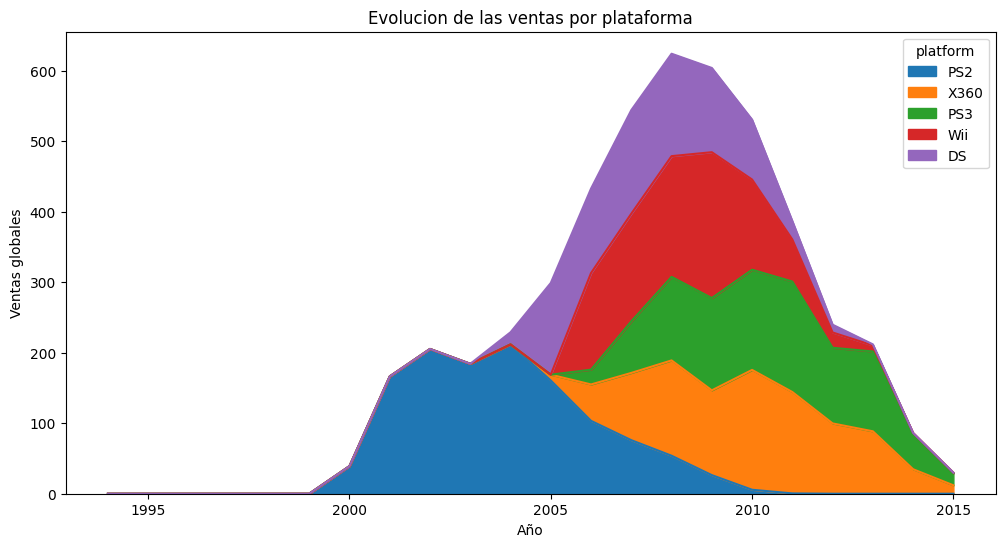

In [21]:
# ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables
top_platforms = ["PS2", "X360", "PS3", "Wii", "DS"] # Se crea las plataformas top
platform_year_sales[top_platforms].plot(kind="area", figsize=(12,6)) # Me gusto usar "area" ya que se ve mas claro subidas y bajadas
plt.title("Evolucion de las ventas por plataforma")
plt.xlabel("Año")
plt.ylabel("Ventas globales")
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>


Excelente, muy buen gráfico para comparar la dominancia de las plataformas para cada año.


</div>

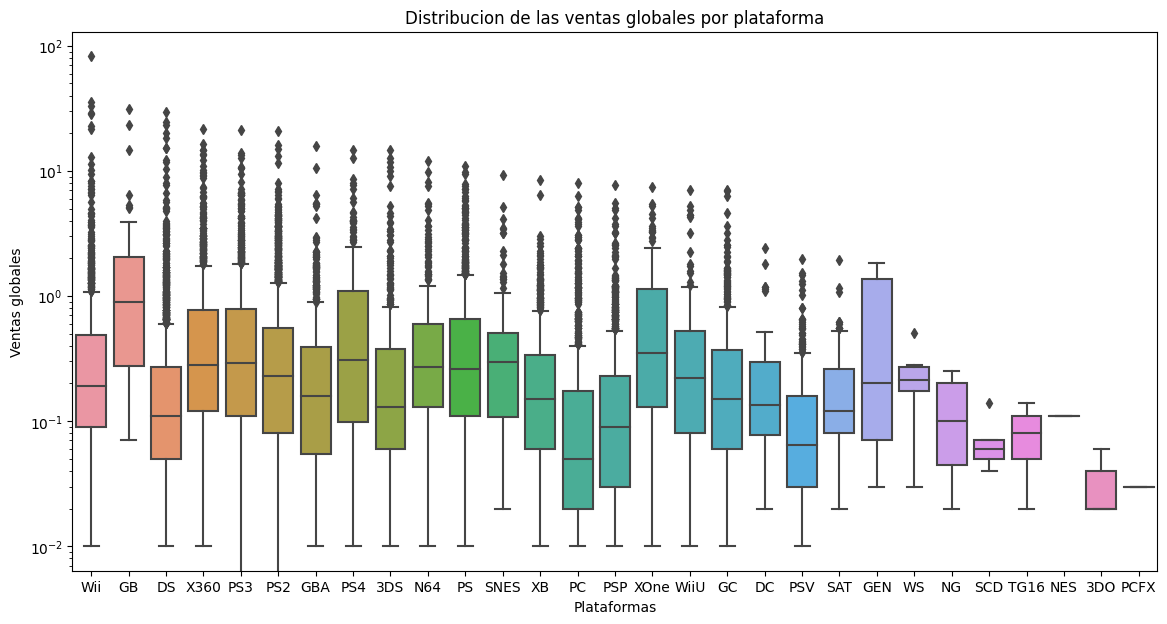

In [22]:
# Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma
plt.figure(figsize=(14,7))
ax = sns.boxplot(x="platform", y="global_sales", data=games_filtered) # Se seleccionan las columnas a usar y usamos ax.set.. para que pudiera respetar los titulos 
ax.set_yscale('log') # Investigue y use esta funciona para que las cajas por plataforma se pudieran notar de una mejor manera.
ax.set_title("Distribucion de las ventas globales por plataforma")
ax.set_xlabel("Plataformas")
ax.set_ylabel("Ventas globales")
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho, correcto el gráfico. Se puede apreciar la variabilidad de ventas de cada consola gracias a la escala logarítmica.

</div>

¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

- En lo que puedo interpretar en el diagrama veo una media no con tanta diferencia entre consolas se puede decir qu hay un promedio de ventas por plataforma.

Text(0.5, 1.0, 'Reseñas de criticos VS Ventas(Xone)')

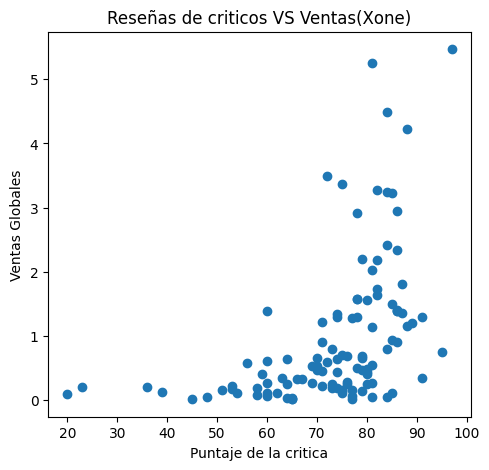

In [23]:
# Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas
xone_games = games_filtered[games_filtered["platform"] == "XOne"].copy() # Filtramos la plataforma de XOne 
#Reseña de criticos
plt.figure(figsize=(12,5)) # Grafica de reseña de criticos
plt.subplot(1,2,1)
plt.scatter(xone_games["critic_score"], xone_games["global_sales"])
plt.xlabel("Puntaje de la critica")
plt.ylabel("Ventas Globales")
plt.title("Reseñas de criticos VS Ventas(Xone)")

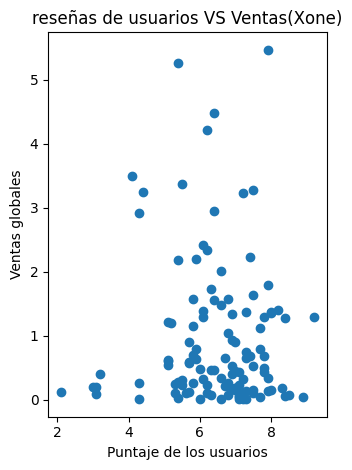

In [24]:
#Reseña de usuarios
plt.subplot(1,2,2)
plt.scatter(xone_games["user_score"], xone_games["global_sales"])
plt.xlabel("Puntaje de los usuarios")
plt.ylabel("Ventas globales")
plt.title("reseñas de usuarios VS Ventas(Xone)")

plt.tight_layout()
plt.show()

Conclusiones: la correlacion de la reseña de los criticos es mas positiva no mucho pero si. la correlacion de los usuarios es muy debil lo que muestra que las ventas pueden influir mas en las reseñas de los criticos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho con el gráfico y el cálculo del coeficiente. Permite obtener una visión general de la correlación entre ambas variables.

</div>

In [25]:
# Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
multi_platform = games_filtered.groupby("name")["platform"].nunique()
multi_platform = multi_platform[multi_platform > 1].sort_values(ascending=False) # juegos en mas de una plataforma. usare el que este en mas plataformas
multi_platform.head(10)

name
Need for Speed: Most Wanted                10
FIFA 14                                     9
Ratatouille                                 9
LEGO Marvel Super Heroes                    9
LEGO The Hobbit                             8
FIFA Soccer 13                              8
Angry Birds Star Wars                       8
FIFA 15                                     8
LEGO Jurassic World                         8
LEGO Star Wars II: The Original Trilogy     8
Name: platform, dtype: int64

In [26]:
multi_platform_games = games_filtered[games_filtered["name"].isin(multi_platform.index)] # Extramos los datos de esos juegos para analizar
multi_platform_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
36,Call of Duty: Modern Warfare 2,X360,2009,Shooter,8.52,3.59,0.08,1.28,94.0,6.3,M,13.47


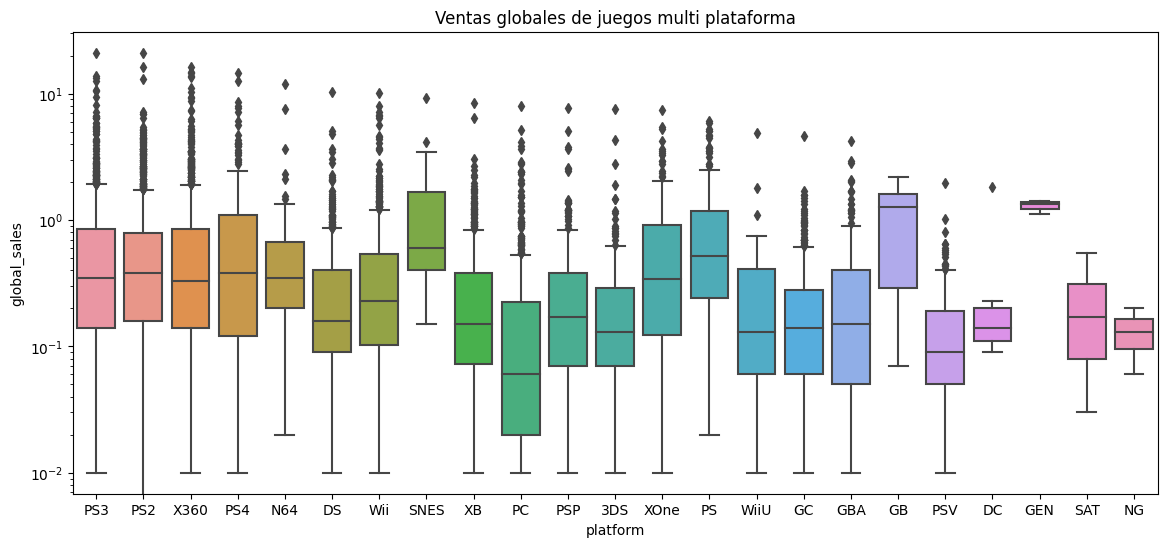

In [27]:
# crear grafico
plt.figure(figsize=(14,6))
sns.boxplot(x="platform", y="global_sales", data=multi_platform_games)
plt.yscale('log')
plt.title("Ventas globales de juegos multi plataforma")
plt.show()

Se puede concluir que un mismo juego se vende mas en platafromas populares. confirma que si influye la plataforma como la calidad del juego.

In [28]:
# Echa un vistazo a la distribución general de los juegos por género.
games_filtered["genre"].value_counts()

Action          3048
Sports          2212
Misc            1675
Role-Playing    1397
Adventure       1228
Shooter         1211
Racing          1187
Simulation       831
Platform         804
Fighting         798
Strategy         651
Puzzle           535
Name: genre, dtype: int64

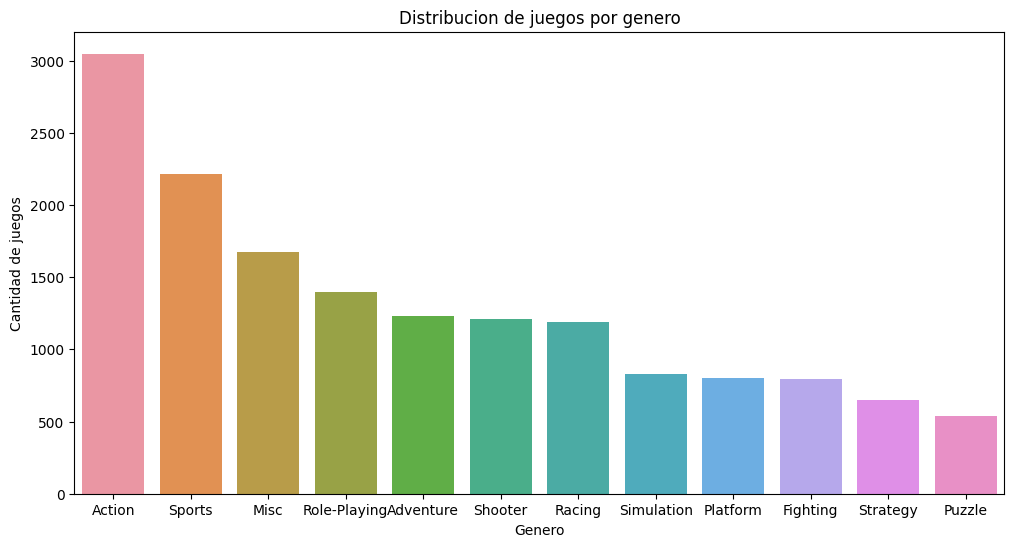

In [29]:
# ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?
#Grafica para ver que genero tiene mas juegos.
plt.figure(figsize=(12,6))
sns.countplot(x="genre", data=games_filtered, order=games_filtered["genre"].value_counts().index)
plt.title("Distribucion de juegos por genero")
plt.xlabel("Genero")
plt.ylabel("Cantidad de juegos")
plt.show()

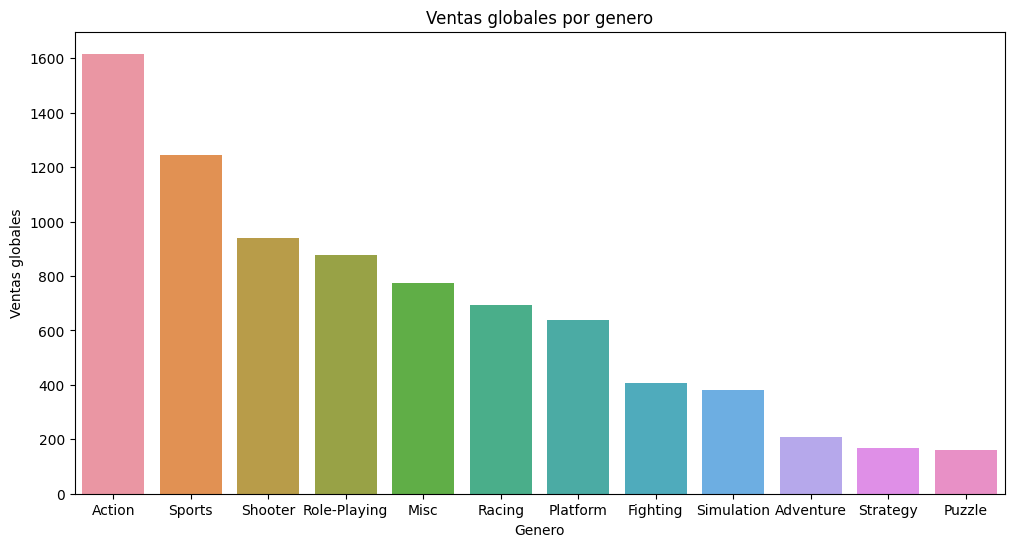

In [30]:
# Grafica para ver las ventas globales por genero
genre_sales = games_filtered.groupby("genre")["global_sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title("Ventas globales por genero")
plt.xlabel("Genero")
plt.ylabel("Ventas globales")
plt.show()

Conclusiones: los generos de Accion. Sport y Shotter son los que atraen mas al publico lo que hace mas rentable en ventas totales.

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>


Bien hecho, correctos ambos gráficos, se complementan. Sin embargo, hubiese sido más directo mostrar la media, para poder compararlos rápidamente.


</div>

## Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

In [31]:
# Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
na_platform_sales = games_filtered.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head(5) # top 5 plataformas en NA
eu_platform_sales = games_filtered.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head(5) # top 5 plataformas en EU
jp_platform_sales = games_filtered.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head(5) # top 5 plataformas en jp
print("Top 5 plataformas en Norteamérica:")
print(na_platform_sales)
print("\nTop 5 plataformas en Europa:")
print(eu_platform_sales)
print("\nTop 5 plataformas en Japon:")
print(jp_platform_sales)

Top 5 plataformas en Norteamérica:
platform
X360    595.05
PS2     572.92
Wii     486.81
PS3     389.46
DS      380.31
Name: na_sales, dtype: float64

Top 5 plataformas en Europa:
platform
PS2     332.63
PS3     325.95
X360    267.61
Wii     258.21
PS      212.39
Name: eu_sales, dtype: float64

Top 5 plataformas en Japon:
platform
DS     175.00
PS     139.78
PS2    137.54
3DS     92.59
PS3     78.11
Name: jp_sales, dtype: float64


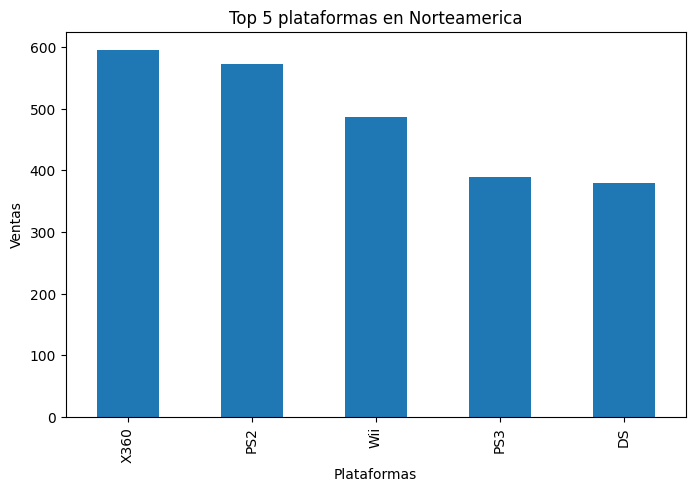

In [32]:
na_platform_sales.plot(kind="bar", title="Top 5 plataformas en Norteamerica", figsize=(8,5)) # Grafica ventas en NA
plt.ylabel("Ventas")
plt.xlabel("Plataformas")
plt.show()

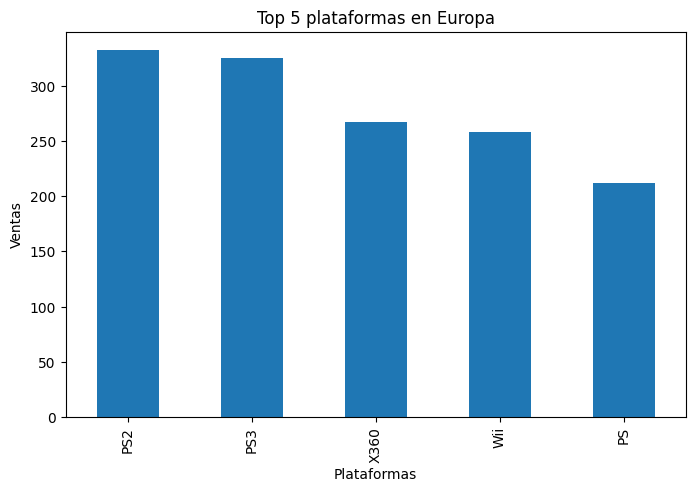

In [33]:
eu_platform_sales.plot(kind="bar", title="Top 5 plataformas en Europa", figsize=(8,5)) # grafica ventas EU
plt.ylabel("Ventas")
plt.xlabel("Plataformas")
plt.show()

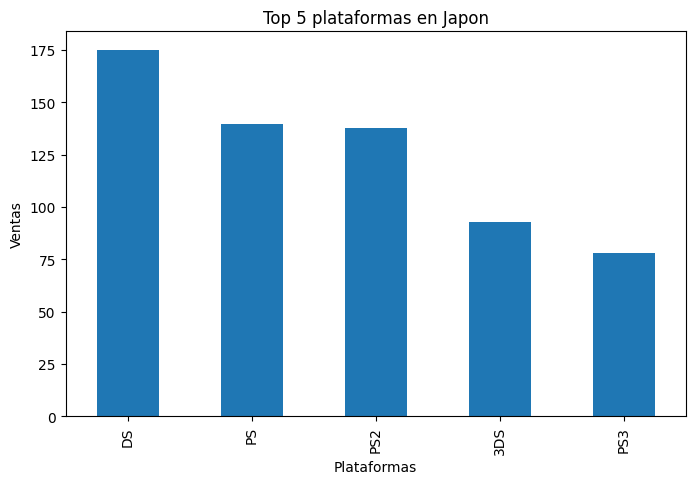

In [34]:
jp_platform_sales.plot(kind="bar", title="Top 5 plataformas en Japon", figsize=(8,5)) # grafica ventas JP
plt.ylabel("Ventas")
plt.xlabel("Plataformas")
plt.show()

Conclusiones de las plataformas: En EU y NA dominan consolas como X360 y PS2 mientras que en japon domina mas DS, 3DS lo que nos lleva que en EU y NA apoyan mas como las plataformas locales y en JP tambien apoyan mas sus consolas como en nintendo que es japonesa

In [35]:
# Los cinco géneros principales. Explica la diferencia.
na_genre_sales = games_filtered.groupby("genre")["na_sales"].sum().sort_values(ascending=False).head(5)
eu_genre_sales = games_filtered.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).head(5)
jp_genre_sales = games_filtered.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).head(5)
print("Top 5 generos en Norteamérica:")
print(na_genre_sales)
print("\nTop 5 generos en Europa:")
print(eu_genre_sales)
print("\nTop 5 generos en Japon:")
print(jp_genre_sales)

Top 5 generos en Norteamérica:
genre
Action     805.39
Sports     650.03
Shooter    515.06
Misc       393.16
Racing     342.09
Name: na_sales, dtype: float64

Top 5 generos en Europa:
genre
Action     492.79
Sports     355.89
Shooter    294.90
Racing     228.55
Misc       209.03
Name: eu_sales, dtype: float64

Top 5 generos en Japon:
genre
Role-Playing    314.79
Action          140.23
Sports          108.62
Misc             98.93
Platform         83.96
Name: jp_sales, dtype: float64


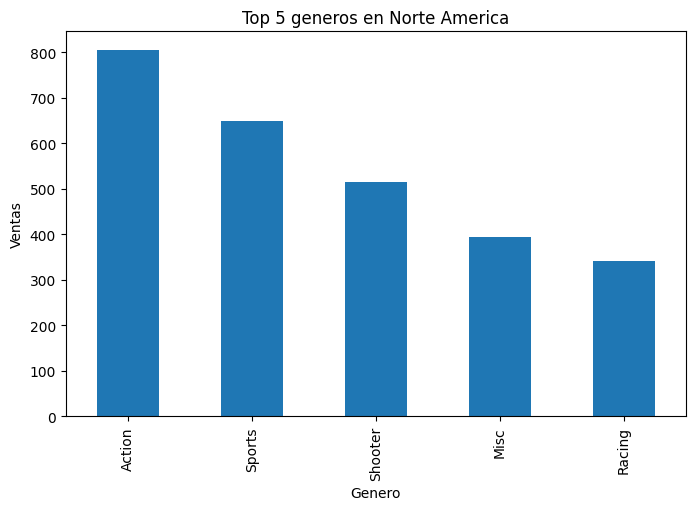

In [36]:
# Grafico ventas Genero NA
na_genre_sales.plot(kind="bar", figsize=(8,5))
plt.title("Top 5 generos en Norte America")
plt.ylabel("Ventas")
plt.xlabel("Genero")
plt.show()

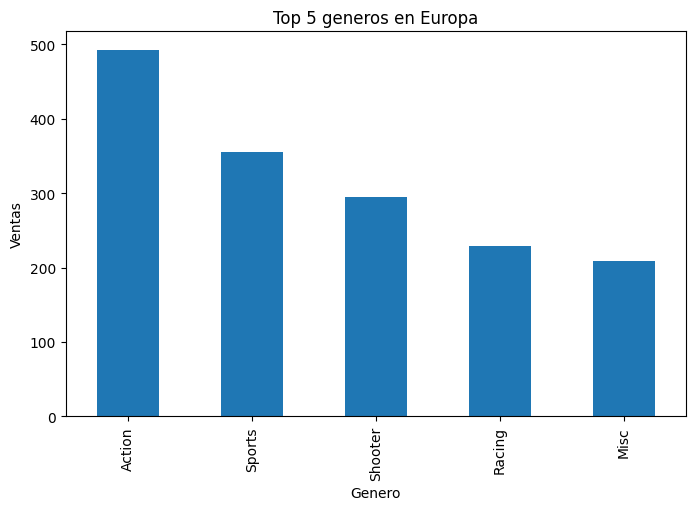

In [37]:
# Grafico ventas Genero EU
eu_genre_sales.plot(kind="bar", figsize=(8,5))
plt.title("Top 5 generos en Europa")
plt.ylabel("Ventas")
plt.xlabel("Genero")
plt.show()

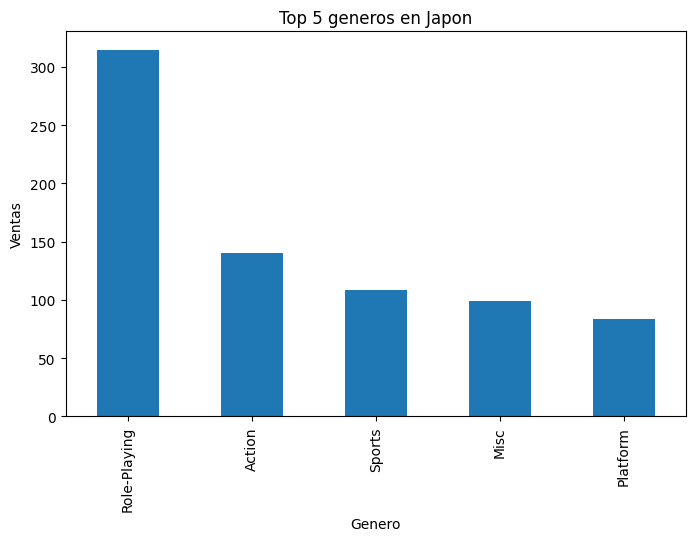

In [38]:
# Grafico ventas Genero JP
jp_genre_sales.plot(kind="bar", figsize=(8,5))
plt.title("Top 5 generos en Japon")
plt.ylabel("Ventas")
plt.xlabel("Genero")
plt.show()

Conclusiones de Generos: En NA y EU mandan los juegos de accion y deportes mientras que en JP domina los juegos de RPG. 

In [39]:
# Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
na_esrb_sales = games_filtered.groupby("rating")["na_sales"].sum().sort_values(ascending=False)
eu_esrb_sales = games_filtered.groupby("rating")["eu_sales"].sum().sort_values(ascending=False)
jp_esrb_sales = games_filtered.groupby("rating")["jp_sales"].sum().sort_values(ascending=False)
print("Ventas por ESRB en Norteamérica:")
print(na_esrb_sales)
print("\nVentas por ESRB en Europa:")
print(eu_esrb_sales)
print("\nVentas por ESRB en Japon:")
print(jp_esrb_sales)

Ventas por ESRB en Norteamérica:
rating
E       1266.27
T        738.63
M        727.20
E10+     341.69
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64

Ventas por ESRB en Europa:
rating
E       690.26
M       463.46
T       411.20
E10+    179.52
AO        0.61
K-A       0.27
EC        0.11
RP        0.03
Name: eu_sales, dtype: float64

Ventas por ESRB en Japon:
rating
E       196.89
T       148.43
M        62.38
E10+     39.75
K-A       1.46
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64


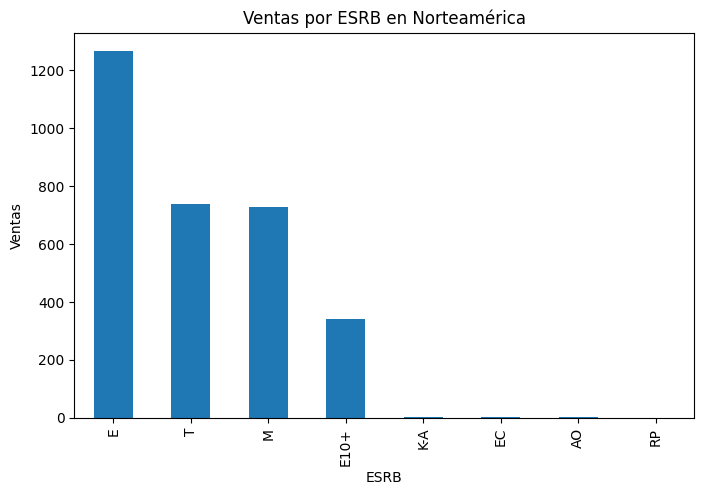

In [40]:
# Grafico ventas por ESRB NA
na_esrb_sales.plot(kind="bar", figsize=(8,5))
plt.title("Ventas por ESRB en Norteamérica")
plt.ylabel("Ventas")
plt.xlabel("ESRB")
plt.show()

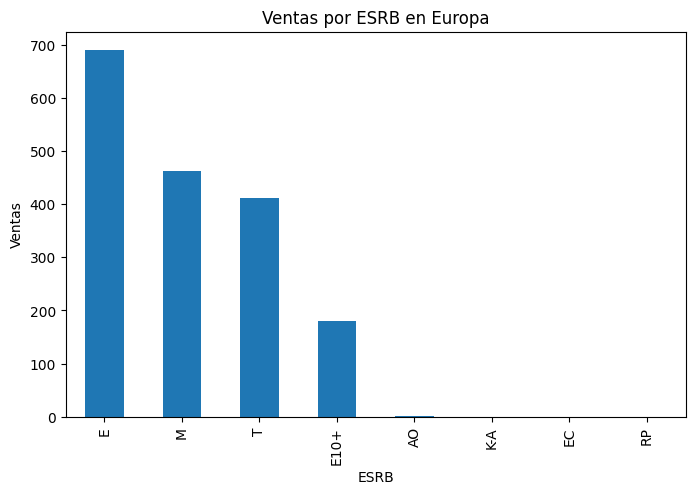

In [41]:
# Grafico ventas por ESRB EU
eu_esrb_sales.plot(kind="bar", figsize=(8,5))
plt.title("Ventas por ESRB en Europa")
plt.ylabel("Ventas")
plt.xlabel("ESRB")
plt.show()

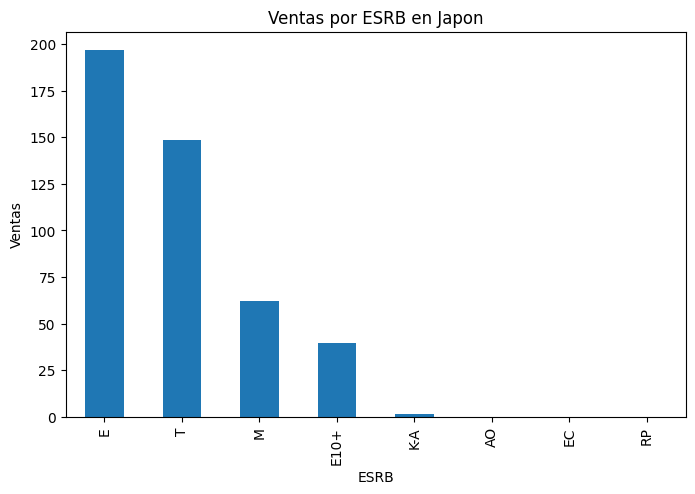

In [42]:
# Grafico ventas por ESRB JP
jp_esrb_sales.plot(kind="bar", figsize=(8,5))
plt.title("Ventas por ESRB en Japon")
plt.ylabel("Ventas")
plt.xlabel("ESRB")
plt.show()

Conclusiones en ESRB: En NA y EU Se venden mas juegos M y E pero en JP hay mucha diferencia en ventas se debe a que hay muchos NaN en las calificaciones.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho, muy bien con la comparación entre las regiones. Es importante revisar diferentes dimensiones entre cada uno, esto revela puntos importantes de segmentación que podrían ser beneficiosos para un modelo de predicción. Por ejemplo, observamos que Japón es muy diferente respecto a las otras regiones en varios aspectos, tal vez esto justifique diferentes modelos o reglas para esta región.
    
</div>

## Paso 5. Prueba las siguientes hipótesis:

### Planteamiento de la hipotesis y que criterio utilice:

## Hipotesis 1: Usuarios de Xone vs Pc
- Ho(nula): Las calificaciones promedio de los usuarios de xone y pc son iguales
- H1(alternativa): las calificaciones primedio de los usuarios xone y pc son diferentes.

- Criterio: Estamo probando la media entre 2 grupos independientes, hay que usar una prueba t de student para muestras independientes.

In [48]:
alpha = 0.05
xone_score = games_filtered[games_filtered["platform"] == "XOne"]["user_score"].dropna()
pc_score = games_filtered[games_filtered["platform"] == "PC"]["user_score"].dropna()

test1= st.ttest_ind(xone_score, pc_score, equal_var=False)
print("Hipotesis 1: XOne vs PC")
print("p-value:", test1.pvalue)

if test1.pvalue < alpha:
    print("Rechazamos Ho, Si hay diferencia significativas entre Xone y PC")
else:
    print("No se rechaza Ho, No hay datos de diferencia significativa entre Xone y PC")

Hipotesis 1: XOne vs PC
p-value: 2.491139805005304e-06
Rechazamos Ho, Si hay diferencia significativas entre Xone y PC


## Hipotesis 2: Accion vs Deportes
- Ho(nula): las calificaciones promedio de los usuarios en los juegos de deporte y accion son iguales
- H1(alternativa): Las calificaicones promedio de los usuarios en lso juegos de deporte y accion son diferentes
- Criterio: Mismo criterio son 2 grupos diferentes hay que hacer prueba t de students

In [53]:
alpha = 0.05
action_score = games_filtered[games_filtered["genre"] == "Action"]["user_score"].dropna()
sport_score = games_filtered[games_filtered["genre"] == "Sports"]["user_score"].dropna()

test2 = st.ttest_ind(action_score, sport_score, equal_var=False)
print("Hipotesis 2: Accion vs Deportes")
print("p-value", test2.pvalue)

if test2.pvalue < alpha:
    print("Rechazamos Ho, Si hay diferencia importante entre accion y deportes")
else:
    print("No se rechaza Ho, No hay datos de diferencia importante entre accion y deporte")

Hipotesis 2: Accion vs Deportes
p-value 0.2168871802102412
No se rechaza Ho, No hay datos de diferencia importante entre accion y deporte


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho con los tests, fueron realizados de forma correcta. 

Es importante mencionar que el t-test asume que las dos muestras tienen varianzas iguales Para verificar esa igualdad de varianzas podemos usar el **test de Levene**. Este nos dice si la variabilidad entre los grupos es *estadísticamente diferente*. En futuros notebooks podrías utilizar este test para decidir sobre la igualdad de varianzas. En corto, el flujo sería así

1. Usamos `levene()` para verificar si las varianzas son iguales.
2. Dependiendo del resultado, usamos `ttest_ind()` con el argumento `equal_var`:
   - `equal_var=True` si Levene dice que las varianzas son iguales (p > 0.05).
   - `equal_var=False` si Levene dice que las varianzas son diferentes (p < 0.05).

</div>

## Paso 6. Escribe una conclusión general

Conclusion: En todo el analisis hecho puedo confirmar que si afecta en la venta de los videojuegos las regiones, las plataformas y el genero de estos. en el tema de las calificaciones ESRB Puede que no se pueda comparar Japon ya que hay mucho datos nulos (NaN) y eso puede varias mucho los datos en comparacion con Norte amercia y Europa. 
Con todo este analisis hecho podemos planear lanzamientos y estrategia de publicidad para saber en que mercado sacar los juegos.

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

De acuerdo con estas conclusiones, pero le faltan detalles. Entre los puntos más importantes para el pronóstico de 2017 están las plataformas que serán relevantes, la segmentación de géneros por importancia de ventas y la caracterización de cada región. Para realizar una predicción del siguiente año se podría considerar cada segmento por separado para ajustar diferentes modelos.
    
Podrías mejorar tus conclusiones incluyendo algunos valores de las métricas más importantes, así las afirmaciones realizadas estarían mejor apoyadas en hechos.
    
</div>